In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_excel("Data.xlsx")
df

,NO,KECAMATAN,2019,2020,2021,2022,Jumlah
0,1,Samalanga,8,10,4,33,55
1,2,Jeunieb,11,8,12,38,69
2,3,Peudada,14,13,12,42,81
3,4,Jeumpa,29,20,27,104,180
4,5,Peusangan,36,42,61,155,294
5,6,Makmur,7,5,7,13,32
6,7,Gandapura,7,8,10,26,51
7,8,pandrah,3,2,5,8,18
8,9,Juli,14,17,13,110,154
9,10,Jangka,9,12,13,42,76


In [3]:
df.isna().sum()

NO           0
KECAMATAN    0
2019         0
2020         0
2021         0
2022         0
Jumlah       0
dtype: int64

In [4]:
X = df.drop(columns=['NO', 'KECAMATAN', 'Jumlah'])
X

,2019,2020,2021,2022
0,8,10,4,33
1,11,8,12,38
2,14,13,12,42
3,29,20,27,104
4,36,42,61,155
5,7,5,7,13
6,7,8,10,26
7,3,2,5,8
8,14,17,13,110
9,9,12,13,42


In [5]:
scaler  = StandardScaler()
scaled_data = scaler.fit_transform(X)

df = pd.DataFrame(scaled_data, columns = X.columns)
df.head

<bound method NDFrame.head of         2019      2020      2021      2022
0  -0.497763 -0.222791 -0.800905 -0.415283
1  -0.271103 -0.380602 -0.331409 -0.331237
2  -0.044443  0.013924 -0.331409 -0.264001
3   1.088857  0.566261  0.548896  0.778161
4   1.617730  2.302176  2.544255  1.635422
5  -0.573316 -0.617317 -0.624844 -0.751464
6  -0.573316 -0.380602 -0.448783 -0.532946
7  -0.875530 -0.854033 -0.742218 -0.835509
8  -0.044443  0.329545 -0.272722  0.879015
9  -0.422210 -0.064981 -0.272722 -0.264001
10 -0.271103 -0.775128 -0.448783 -0.566564
11 -0.799976 -0.775128 -0.624844 -0.717846
12  2.826583  2.617797  2.485568  2.980147
13  0.862197  0.408451  0.431522  0.206653
14 -0.951083 -0.854033 -0.683531 -0.768273
15 -0.951083 -0.696222 -0.742218 -0.734655
16 -0.119996 -0.617317  0.314148 -0.297619>

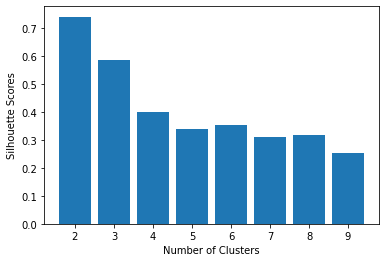

In [6]:
silhouette_scores=[]

for n_cluster in range (2, 10): silhouette_scores.append(silhouette_score(df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df)))
    
plt.bar(range(2, 10), silhouette_scores)
plt.xlabel('Number of Clusters', fontsize = 10)
plt.ylabel('Silhouette Scores', fontsize = 10)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

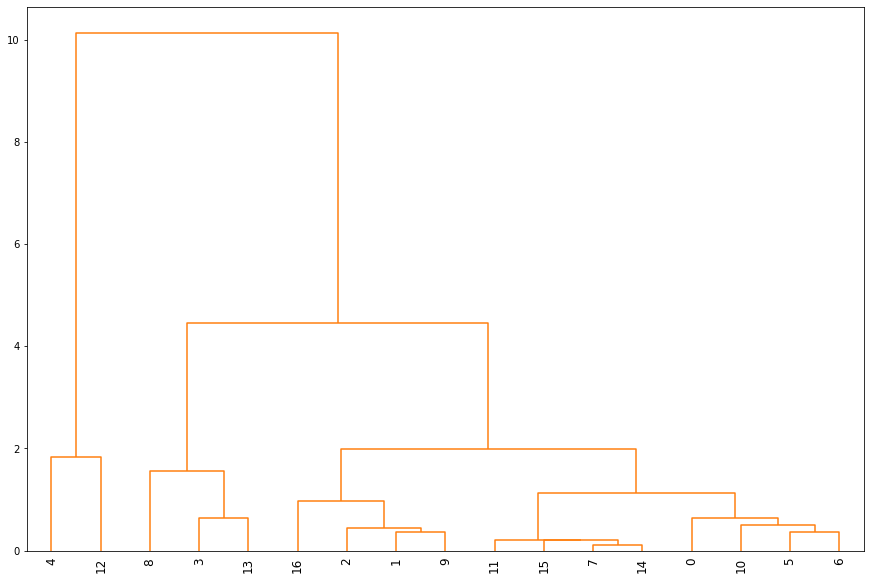

In [7]:
plt.figure(figsize =(15,10))
dendrogram(linkage(df,method="ward"), leaf_rotation=90, p=8, color_threshold=20, leaf_font_size=12, truncate_mode='level')
plt.show

In [8]:
agglo = AgglomerativeClustering(n_clusters = 3)
agglo.fit(df)
labels = agglo.labels_
hasil_agglo=pd.concat([df, pd.DataFrame({'Cluster':labels})], axis=1)
hasil_agglo

,2019,2020,2021,2022,Cluster
0,-0.497763,-0.222791,-0.800905,-0.415283,0
1,-0.271103,-0.380602,-0.331409,-0.331237,0
2,-0.044443,0.013924,-0.331409,-0.264001,0
3,1.088857,0.566261,0.548896,0.778161,2
4,1.617730,2.302176,2.544255,1.635422,1
5,-0.573316,-0.617317,-0.624844,-0.751464,0
6,-0.573316,-0.380602,-0.448783,-0.532946,0
7,-0.875530,-0.854033,-0.742218,-0.835509,0
8,-0.044443,0.329545,-0.272722,0.879015,2
9,-0.422210,-0.064981,-0.272722,-0.264001,0


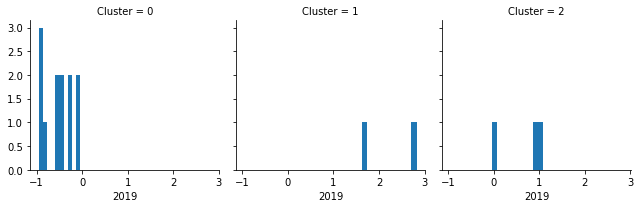

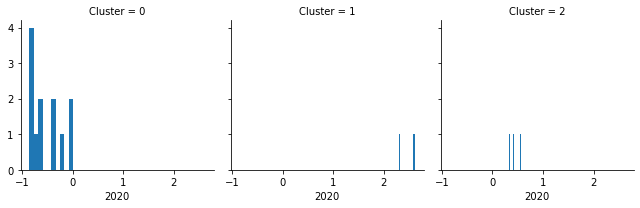

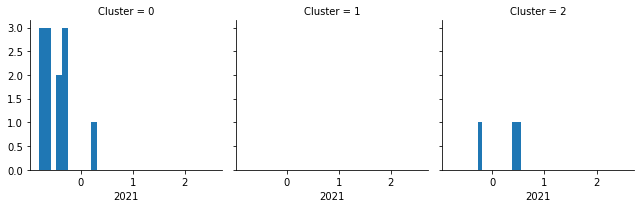

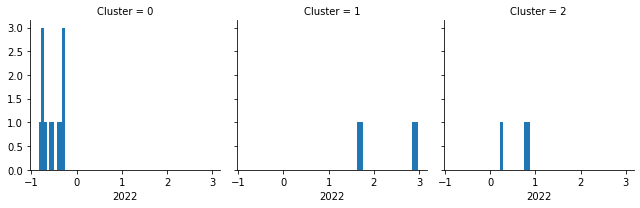

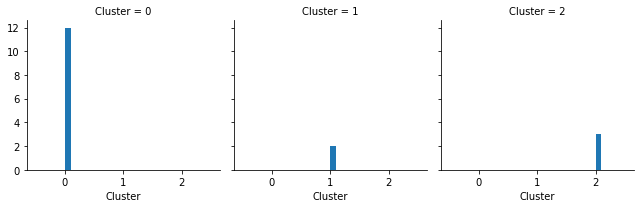

In [9]:
for i in hasil_agglo: 
    grid = sns.FacetGrid(hasil_agglo, col='Cluster')
    grid.map(plt.hist, i)

In [10]:
dist = 1 - cosine_similarity(df)

pca = PCA(n_components = 2)
pca = pca.fit_transform(dist)

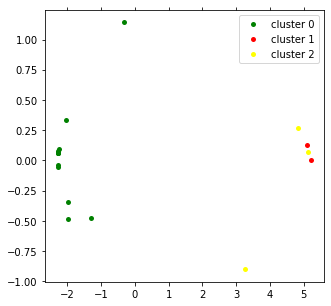

In [11]:
x, y = pca[:, 0], pca[:,1] 

warna = {0: 'green',
         1: 'red',
         2: 'yellow'}

label_pca = {0: 'cluster 0',
             1: 'cluster 1',
             2: 'cluster 2'}

df = pd.DataFrame({'X': x, 'Y':y, 'label':labels})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(5,5))

for name, group in groups :
    ax.plot(group.X, group.Y, marker='o', linestyle='', ms = 5,
           color=warna[name],label=label_pca[name],mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both', bottom='off', top='off', labelbottom='off')
    
ax.legend()

In [12]:
X['cluster'] = agglo.labels_
def cc(cluster):
    if cluster == 0:
        return 3
    elif cluster == 1:
        return 1
    else :
        return 2
df['cluster'] = X['cluster'].apply(cc)


In [13]:
df

,X,Y,label,cluster
0,-1.978887,-0.487592,0,3
1,-2.247522,0.091475,0,3
2,-1.298097,-0.475064,0,3
3,5.115879,0.067932,2,2
4,5.100989,0.125025,1,1
5,-2.278577,0.061507,0,3
6,-2.278151,-0.040137,0,3
7,-2.291286,0.062803,0,3
8,3.251847,-0.901855,2,2
9,-1.968068,-0.345059,0,3


<AxesSubplot: xlabel='cluster', ylabel='count'>

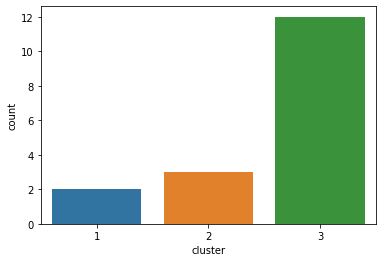

In [14]:
sns.countplot(x='cluster',data=df)

In [15]:
cluster_a = df[df['cluster'] == 1]
cluster_b = df[df['cluster'] == 2]
cluster_c = df[df['cluster'] == 3]

a = len(cluster_a)/len(df)*100
b = len(cluster_b)/len(df)*100
c = len(cluster_c)/len(df)*100
li = [a,b,c]

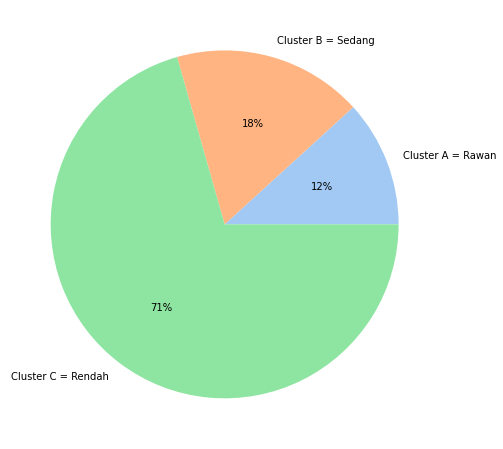

In [16]:
labels = ['Cluster A = Rawan','Cluster B = Sedang','Cluster C = Rendah']
fig = plt.figure(figsize = (8, 8))
colors = sns.color_palette('pastel')[0:len(labels)]
plt.pie(li, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [17]:
df.to_excel('Dataa.xlsx', index = False)

In [18]:
cluster_a

,X,Y,label,cluster
4,5.100989,0.125025,1,1
12,5.219715,0.002928,1,1


In [19]:
cluster_b

,X,Y,label,cluster
3,5.115879,0.067932,2,2
8,3.251847,-0.901855,2,2
13,4.840780,0.272115,2,2


In [20]:
cluster_c

,X,Y,label,cluster
0,-1.978887,-0.487592,0,3
1,-2.247522,0.091475,0,3
2,-1.298097,-0.475064,0,3
5,-2.278577,0.061507,0,3
6,-2.278151,-0.040137,0,3
7,-2.291286,0.062803,0,3
9,-1.968068,-0.345059,0,3
10,-2.035278,0.331179,0,3
11,-2.283375,0.081316,0,3
14,-2.274793,0.064422,0,3
